In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city ="../Desktop/city_data.csv"
ride ="../Desktop/ride_data.csv"

city_df = pd.read_csv(city)
ride_df = pd.read_csv(ride)

raw_data = pd.merge(city_df, ride_df, on='city', how='outer')
raw_data["Total fare"] = raw_data["fare"]
raw_data.head()

In [ ]:
columns = {'fare' : 'Average Fare', 'ride_id' : 'Total Rides', 'driver_count' : 'Driver Count'}
agg_dict={'fare': np.mean, 'ride_id' : np.size, 'driver_count' : np.unique, 'Total fare' : np.sum}

In [3]:
final_data = raw_data.groupby(['type','city'], as_index=False).agg(agg_dict).rename(columns=columns)
final_data.head()

,type,city,Average Fare,Total Rides,Driver Count,Total fare
0,Rural,Bradshawfurt,40.064000,10,7,400.64
1,Rural,Garzaport,24.123333,3,7,72.37
2,Rural,Harringtonfort,33.470000,6,4,200.82
3,Rural,Jessicaport,36.013333,6,1,216.08
4,Rural,Lake Jamie,34.358333,6,4,206.15


In [4]:
rural_df=final_data[final_data['type']=="Rural"]
suburban_df=final_data[final_data['type']=="Suburban"]
urban_df=final_data[final_data['type']=="Urban"]

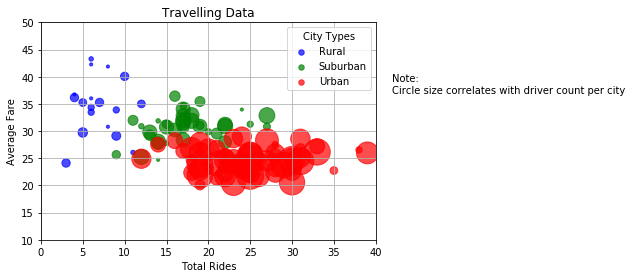

In [7]:
rural_x = rural_df["Total Rides"]
rural_y = rural_df["Average Fare"]
rural_s = rural_df["Driver Count"]
rural_l="Rural"

rural_plt = plt.scatter(rural_x, rural_y, s=rural_s*10, alpha=0.7, color='blue', label=rural_l)

suburban_x = suburban_df["Total Rides"]
suburban_y = suburban_df["Average Fare"]
suburban_s = suburban_df["Driver Count"]
suburban_l="Suburban"

suburban_plt = plt.scatter(suburban_x, suburban_y, s=suburban_s*10, alpha=0.7, color='green',label=suburban_l)

urban_x = urban_df["Total Rides"]
urban_y = urban_df["Average Fare"]
urban_s = urban_df["Driver Count"]
urban_l="Urban"

urban_plt = plt.scatter(urban_x, urban_y, s=urban_s*10, alpha=0.7, color='red', label=urban_l)

plt.title('Travelling Data')
plt.xlabel('Total Rides')
plt.ylabel('Average Fare')
plt.grid(True)
plt.xlim(0,40)
plt.ylim(10,50)


lgnd=plt.legend(title="City Types", loc='best')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]


textstr="Note:\nCircle size correlates with driver count per city"
plt.text(42,37, textstr, fontsize=10)

plt.show()

#                                          Result 1 of Analysis:

       1>  Urban Cities have highest number of rides followed by Suburban and very less in Rural Areas.
       2>  Urban Cities have the highest number of driver count followed by Suburban and at last Rural.
       3>  Average Fare of traveling are more in rural than suburban and even lower in Urban Areas because huge number of                            people are there and trips are of shortest distance.


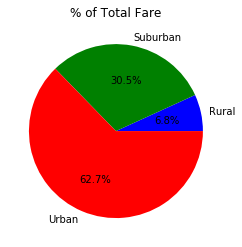

In [16]:
rural_fare = rural_df["Total fare"].sum()/final_data["Total fare"].sum()*100
suburban_fare = suburban_df["Total fare"].sum()/final_data["Total fare"].sum()*100
urban_fare = urban_df["Total fare"].sum()/final_data["Total fare"].sum()*100

labels = ["Rural", "Suburban", "Urban"]
fares = [rural_fare, suburban_fare, urban_fare]
colors = ['blue','green', 'red']

plt.pie(fares, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("% of Total Fare")

plt.show()

#  Result 2 of Analysis

    More than 60% of total fare is generated in urban cities which means large number of people travel from one cities to       another. The reason would be lifestyle of people, distant work and many more.   

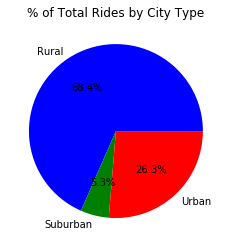

In [18]:
rural_rides=rural_df["Total Rides"].sum()/final_data["Total Rides"].sum()*100
suburban_rides=suburban_df["Total Rides"].sum()/final_data["Total Rides"].sum()*100
urban_rides=urban_df["Total Rides"].sum()/final_data["Total Rides"].sum()*100

city_rides=[urban_rides, rural_rides, suburban_rides]

plt.pie(city_rides, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("% of Total Rides by City Type")

plt.show()

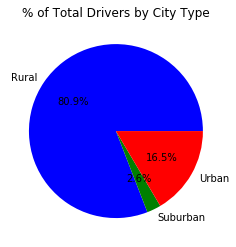

In [19]:
urban_drivers=urban_df["Driver Count"].sum()/final_data["Driver Count"].sum()*100
suburban_drivers=suburban_df["Driver Count"].sum()/final_data["Driver Count"].sum()*100
rural_drivers=rural_df["Driver Count"].sum()/final_data["Driver Count"].sum()*100

city_drivers=[urban_drivers, rural_drivers, suburban_drivers]

plt.pie(city_drivers, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("% of Total Drivers by City Type")

plt.show()